In [1]:
import datetime as dt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
forest = pd.read_csv('fire_archive.csv')

forest.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [3]:
forest.shape

(36011, 15)

In [4]:
forest.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [5]:
forest.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,1.776382e-15,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


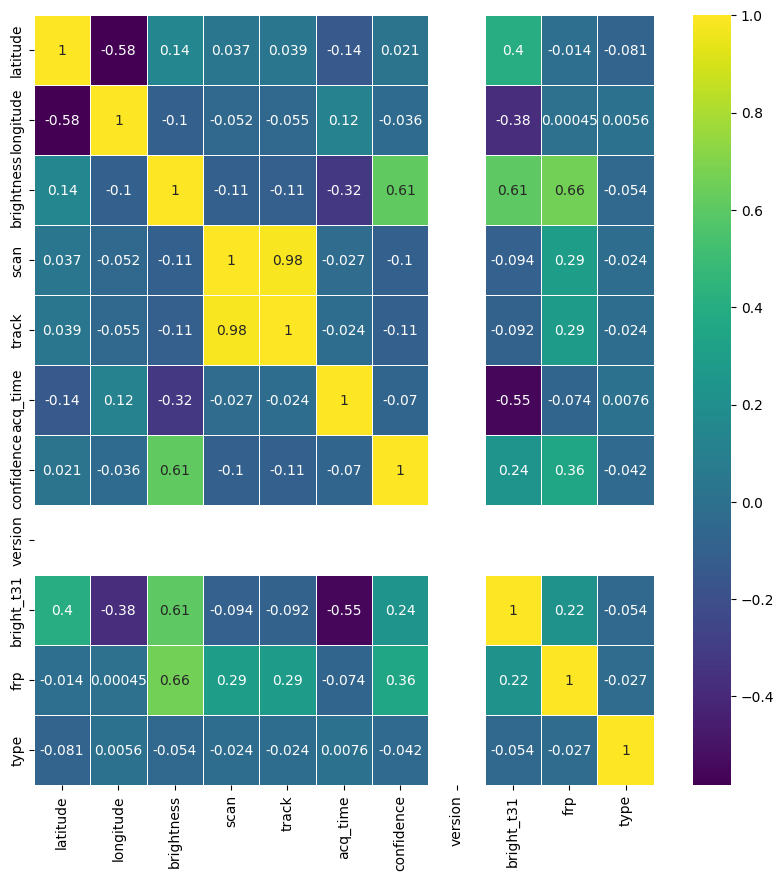

In [6]:
numeric_forest = forest.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_forest.corr(), annot=True, cmap='viridis', linewidths=.5)
plt.show()

In [7]:
forest = forest.drop(['track'], axis = 1)

In [8]:
# Finding categorical data
print("The scan column")
print(forest['scan'].value_counts())
print()
print("The aqc_time column")
print(forest['acq_time'].value_counts())
print()
print("The satellite column")
print(forest['satellite'].value_counts())
print()
print("The instrument column")
print(forest['instrument'].value_counts())
print()
print("The version column")
print(forest['version'].value_counts())
print()
print("The daynight column")
print(forest['daynight'].value_counts())
print()

The scan column
scan
1.0    8284
1.1    6000
1.2    3021
1.3    2412
1.4    1848
1.5    1610
1.6    1451
1.7    1281
1.8    1041
1.9     847
2.0     707
2.2     691
2.1     649
2.3     608
2.5     468
2.4     433
2.8     422
3.0     402
2.7     366
2.9     361
2.6     347
3.1     259
3.2     244
3.6     219
3.4     203
3.3     203
3.8     189
3.9     156
4.7     149
4.3     137
3.7     134
3.5     134
4.1     120
4.6     118
4.5     116
4.2     108
4.0     103
4.4     100
4.8      70
Name: count, dtype: int64

The aqc_time column
acq_time
506     851
454     631
122     612
423     574
448     563
       ... 
246       1
1549      1
1724      1
1629      1
302       1
Name: count, Length: 662, dtype: int64

The satellite column
satellite
Aqua     20541
Terra    15470
Name: count, dtype: int64

The instrument column
instrument
MODIS    36011
Name: count, dtype: int64

The version column
version
6.3    36011
Name: count, dtype: int64

The daynight column
daynight
D    28203
N     7808
Na

In [9]:
forest = forest.drop(['instrument', 'version'], axis = 1)

forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,Terra,48,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,Terra,71,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,Terra,42,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,Terra,33,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,Terra,36,298.8,27.6,D,0


In [10]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

forest['daynight'] = forest['daynight'].map(daynight_map)
forest['satellite'] = forest['satellite'].map(satellite_map)

forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,0


In [11]:
# Looking at another columns type
forest['type'].value_counts()

type
0    35666
2      335
3       10
Name: count, dtype: int64

In [12]:
types = pd.get_dummies(forest['type'])
forest = pd.concat([forest, types], axis=1)

forest = forest.drop(['type'], axis = 1)
forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,0,2,3
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,True,False,False
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,True,False,False
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,True,False,False
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,True,False,False
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,True,False,False


In [13]:
# Renaming columns for better understanding

forest = forest.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})

In [14]:
# Now I mentioned we will be converting scan column to categorical type, we will be doing this using binning method.
# Range for this columns was 1 to 4.8

bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
forest['scan_binned'] = pd.cut(forest['scan'], bins=bins, labels=labels)

forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,True,False,False,1
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,True,False,False,1
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,True,False,False,4
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,True,False,False,2
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,True,False,False,4


In [15]:
# Converting the datatype to datetype from string or numpy.

forest['acq_date'] = pd.to_datetime(forest['acq_date'])

In [16]:
# Now we will be dropping scan column and handle date type data - we can extract useful information from these datatypes 
# just like we do with categorical data.

forest = forest.drop(['scan'], axis = 1)

In [17]:
forest['year'] = forest['acq_date'].dt.year

forest.head()

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned,year
0,-11.8070,142.0583,313.0,2019-08-01,56,1,48,297.3,6.6,1,True,False,False,1,2019
1,-11.7924,142.0850,319.3,2019-08-01,56,1,71,297.3,11.3,1,True,False,False,1,2019
2,-12.8398,132.8744,311.6,2019-08-01,57,1,42,298.7,23.1,1,True,False,False,4,2019
3,-14.4306,143.3035,310.1,2019-08-01,57,1,33,296.1,6.5,1,True,False,False,2,2019
4,-12.4953,131.4897,310.3,2019-08-01,57,1,36,298.8,27.6,1,True,False,False,4,2019


In [18]:
forest['month'] = forest['acq_date'].dt.month
forest['day'] = forest['acq_date'].dt.day

In [19]:
forest.shape

(36011, 17)

In [20]:
# Separating our target varibale:

y = forest['confidence']
fin = forest.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31', 'type_0'], axis = 1)

<Axes: >

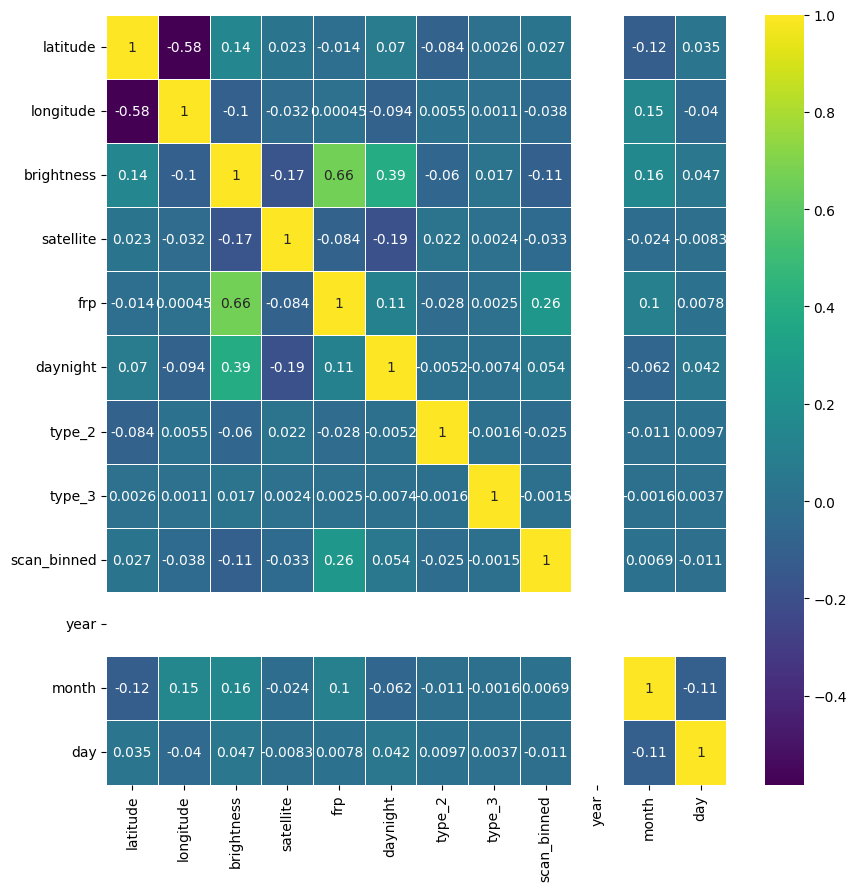

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(fin.corr(),annot=True,cmap='viridis',linewidths=.5)

In [22]:
fin.head()

,latitude,longitude,brightness,satellite,frp,daynight,type_2,type_3,scan_binned,year,month,day
0,-11.8070,142.0583,313.0,1,6.6,1,False,False,1,2019,8,1
1,-11.7924,142.0850,319.3,1,11.3,1,False,False,1,2019,8,1
2,-12.8398,132.8744,311.6,1,23.1,1,False,False,4,2019,8,1
3,-14.4306,143.3035,310.1,1,6.5,1,False,False,2,2019,8,1
4,-12.4953,131.4897,310.3,1,27.6,1,False,False,4,2019,8,1


In [23]:
Xtrain, Xtest, ytrain, ytest = train_test_split(fin, y, test_size=0.2)

In [24]:
n_estimators = [int(x) for x in np.linspace(300, 500, num=20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 50, num=10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 6]
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [25]:
rf = RandomForestRegressor()

In [26]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=500, cv=7, verbose=2, random_state=100, n_jobs=-1)


In [27]:
rf_random.fit(Xtrain, ytrain)

Fitting 7 folds for each of 500 candidates, totalling 3500 fits


d:\Forest Fire\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1687 fits failed out of a total of 3500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1397 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Forest Fire\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Forest Fire\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\Forest Fire\.venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\Forest Fire\.venv\Lib\site-packages\sklearn\utils\

RandomizedSearchCV(cv=7, estimator=RandomForestRegressor(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 14, 18, 23, 27, 32,
                                                      36, 41, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 310, 321, 331,
                                                         342, 352, 363, 373,
                                                         384, 394, 405, 415,
                                                         426, 436, 447, 457,
                                                         468, 478, 489, 500]},
                   random_state=100, verbose=2)

In [29]:
training_accuracy= rf_random.score(Xtrain, ytrain)
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")

Training Accuracy: 95.61%


In [30]:
test_accuracy = rf_random.score(Xtest, ytest)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 66.97%


In [38]:
# Save the trained model as a pickle string.
import pickle
saved_model = pickle.dump(rf_random, open('mysite/polls/ForestModel.pickle','wb'))
  
# Load the pickled model - reg_from_pickle = pickle.load(saved_model)
# Use the loaded pickled model to make predictions - reg_from_pickle.predict(X_test)

In [39]:
pip install bz2file

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import bz2

compressionLevel = 9
source_file = 'mysite/polls/ForestModel.pickle' # this file can be in a different format, like .csv or others...
destination_file = 'mysite/polls/ForestModel.bz2'

with open(source_file, 'rb') as data:
    tarbz2contents = bz2.compress(data.read(), compressionLevel)
    
fh = open(destination_file, "wb")
fh.write(tarbz2contents)
fh.close()